# Load library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [3]:
iris = datasets.load_iris()

In [8]:
X = iris.data[: ,2:4]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [10]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

# Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [13]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 2)
X_test.shape = (45, 2)


# Standardized Data
### not necessary

In [33]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

# Train model

In [22]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
## setting hyper parameter
params = {
    'criterion' : 'gini',
    'n_estimators' : 500,
    'max_samples' : None,
    'max_features' : 'sqrt',
    'max_depth' : None
}

In [30]:
model = RandomForestClassifier(**params)
model

RandomForestClassifier(n_estimators=500)

In [31]:
model.fit(X_train_t, y_train)

RandomForestClassifier(n_estimators=500)

In [35]:
## predict
y_pred = model.predict(X_test_t)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [37]:
## Miss Classification
sumMiss = (y_test != y_pred).sum()
print(f'Miss Classification = {sumMiss}')

Miss Classification = 1


In [38]:
## Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



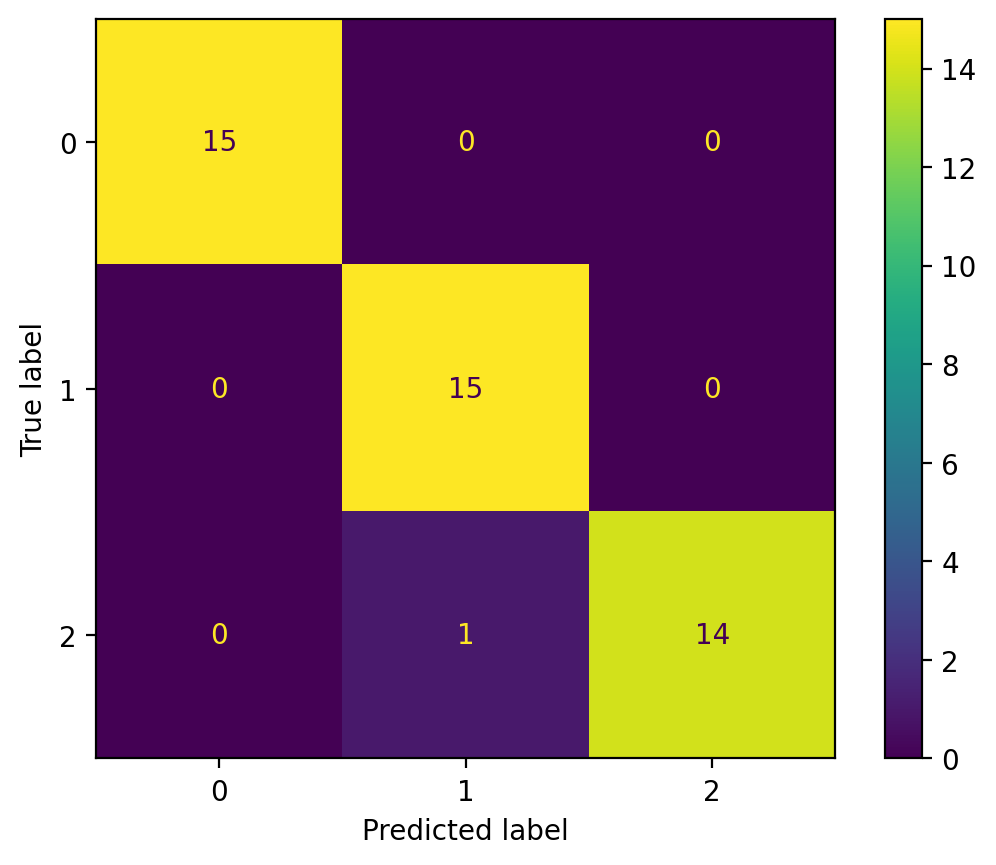

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

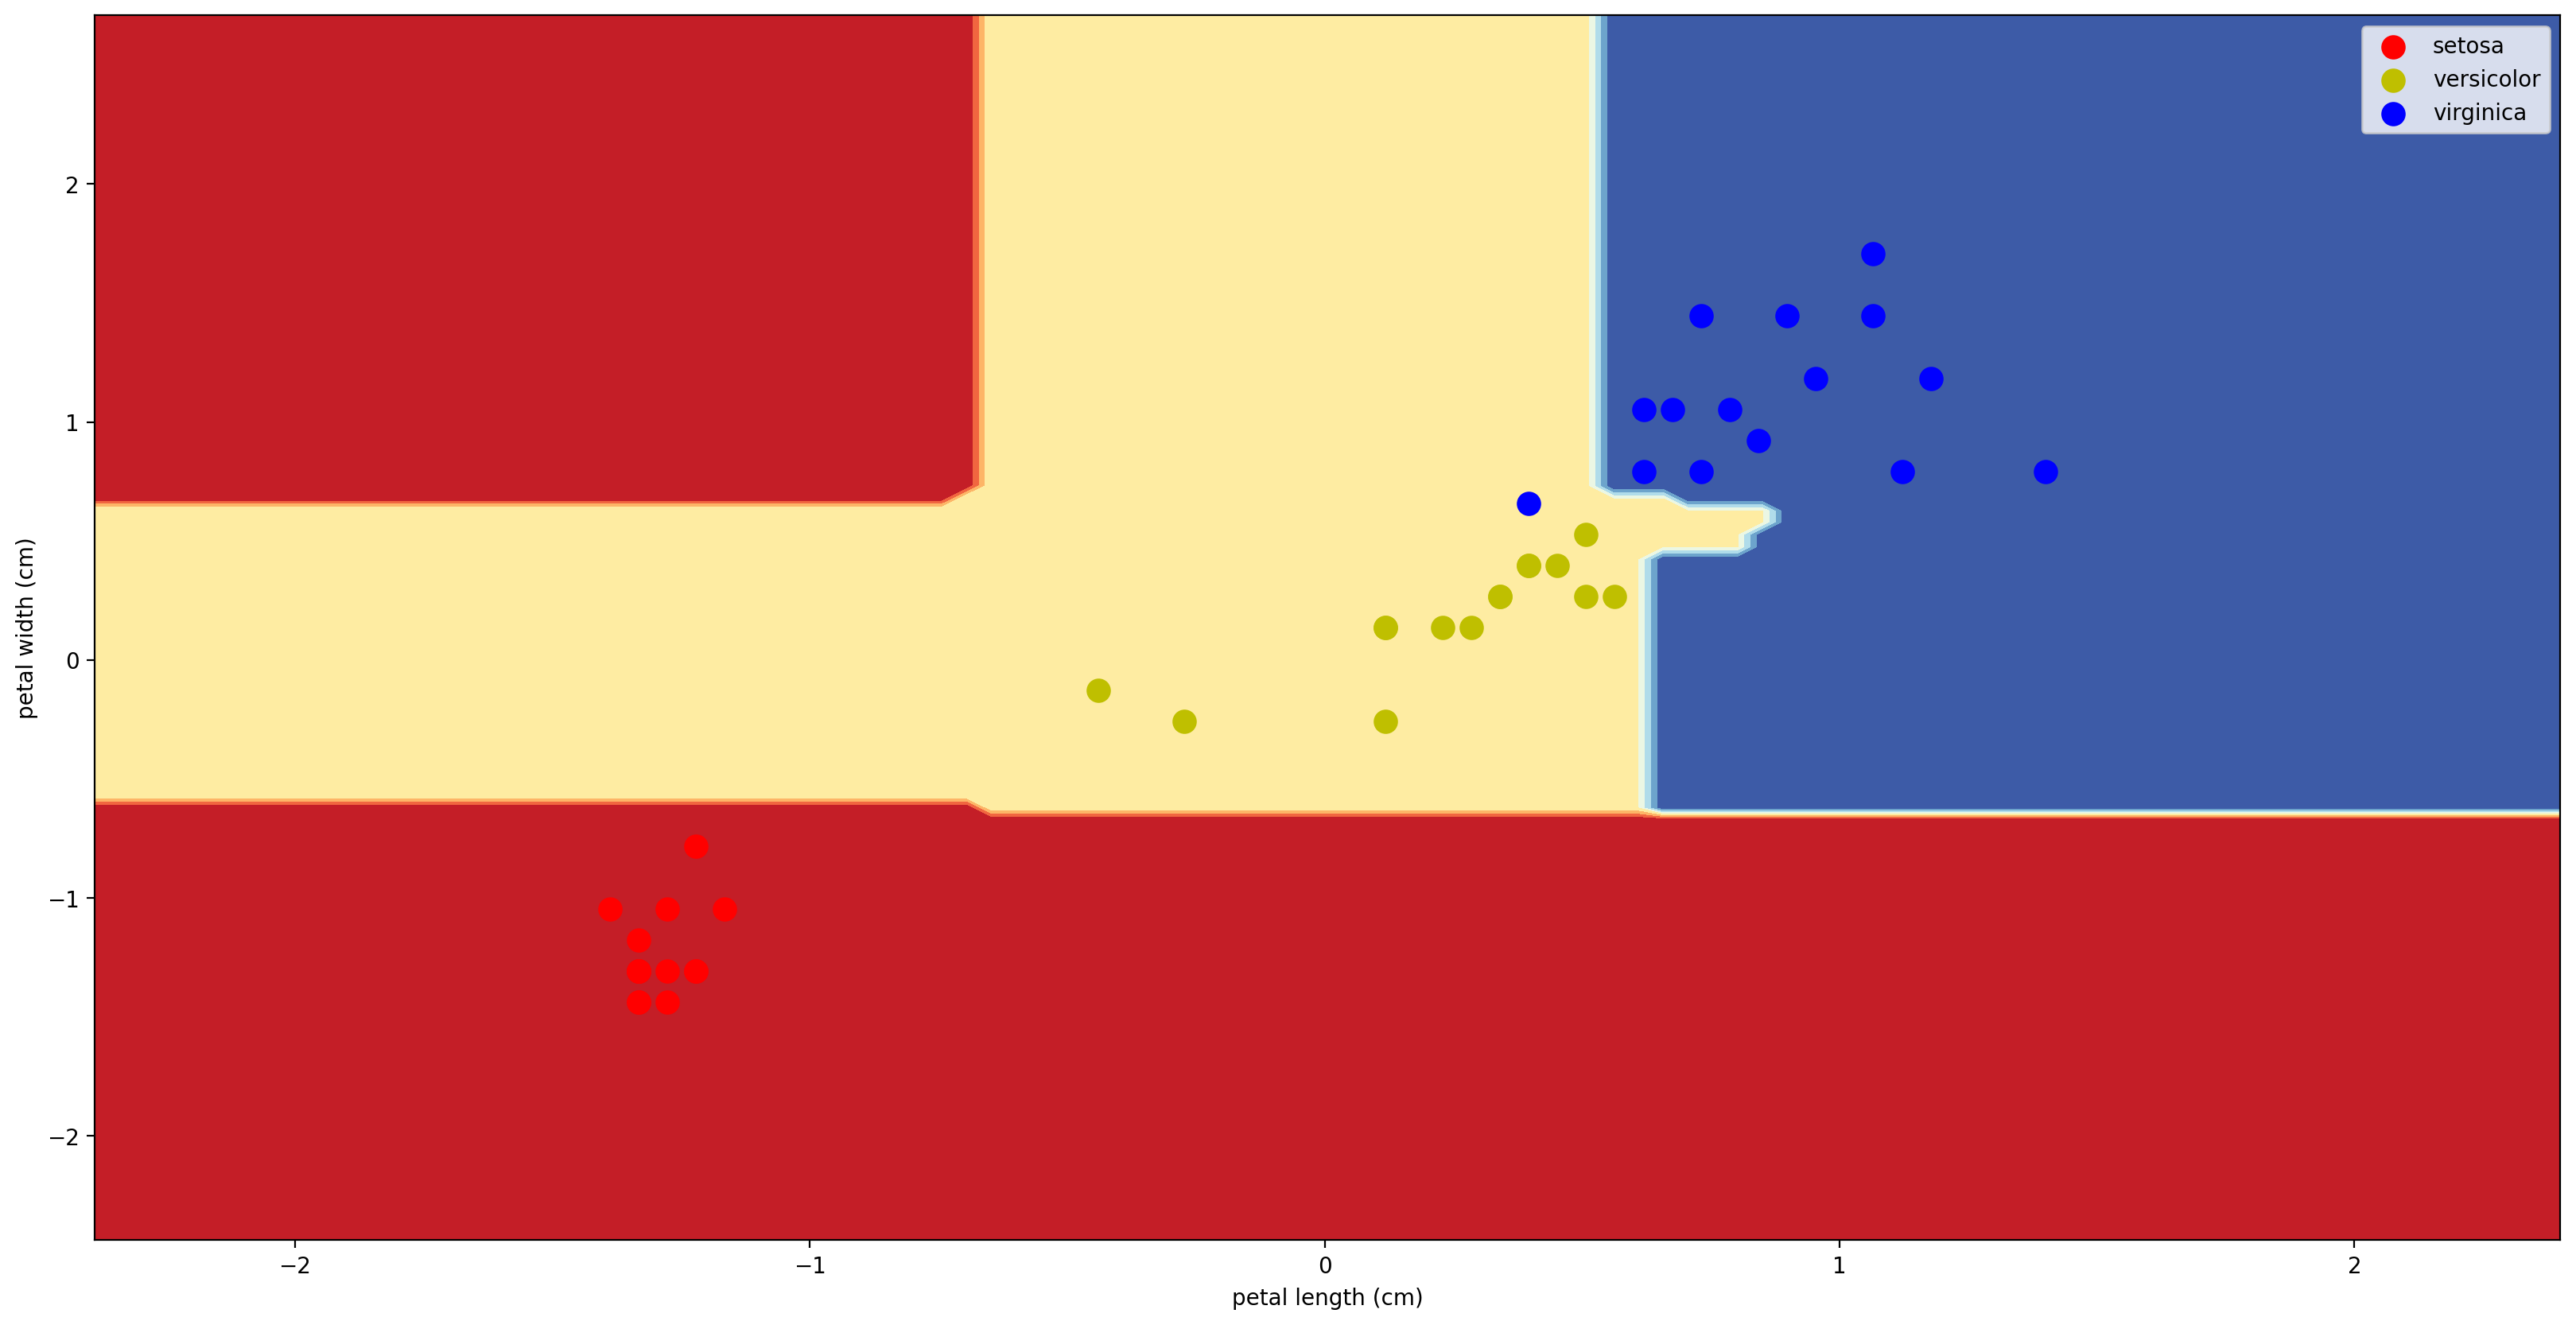

In [72]:
from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

DecisionBoundaryDisplay.from_estimator(
    model,
    X_test_t,
    cmap = plt.cm.RdYlBu,
    response_method='predict',
    ax = ax,
    xlabel = iris.feature_names[2],
    ylabel = iris.feature_names[3]
)

r_code = "ryb"
for i, c in zip(range(3), r_code):
    idx = np.where(y_test == i)
    plt.scatter(
        X_test_t[idx, 0],
        X_test_t[idx, 1],
        c = c,
        label = iris.target_names[i],
        s= 100
        
    )
plt.legend();

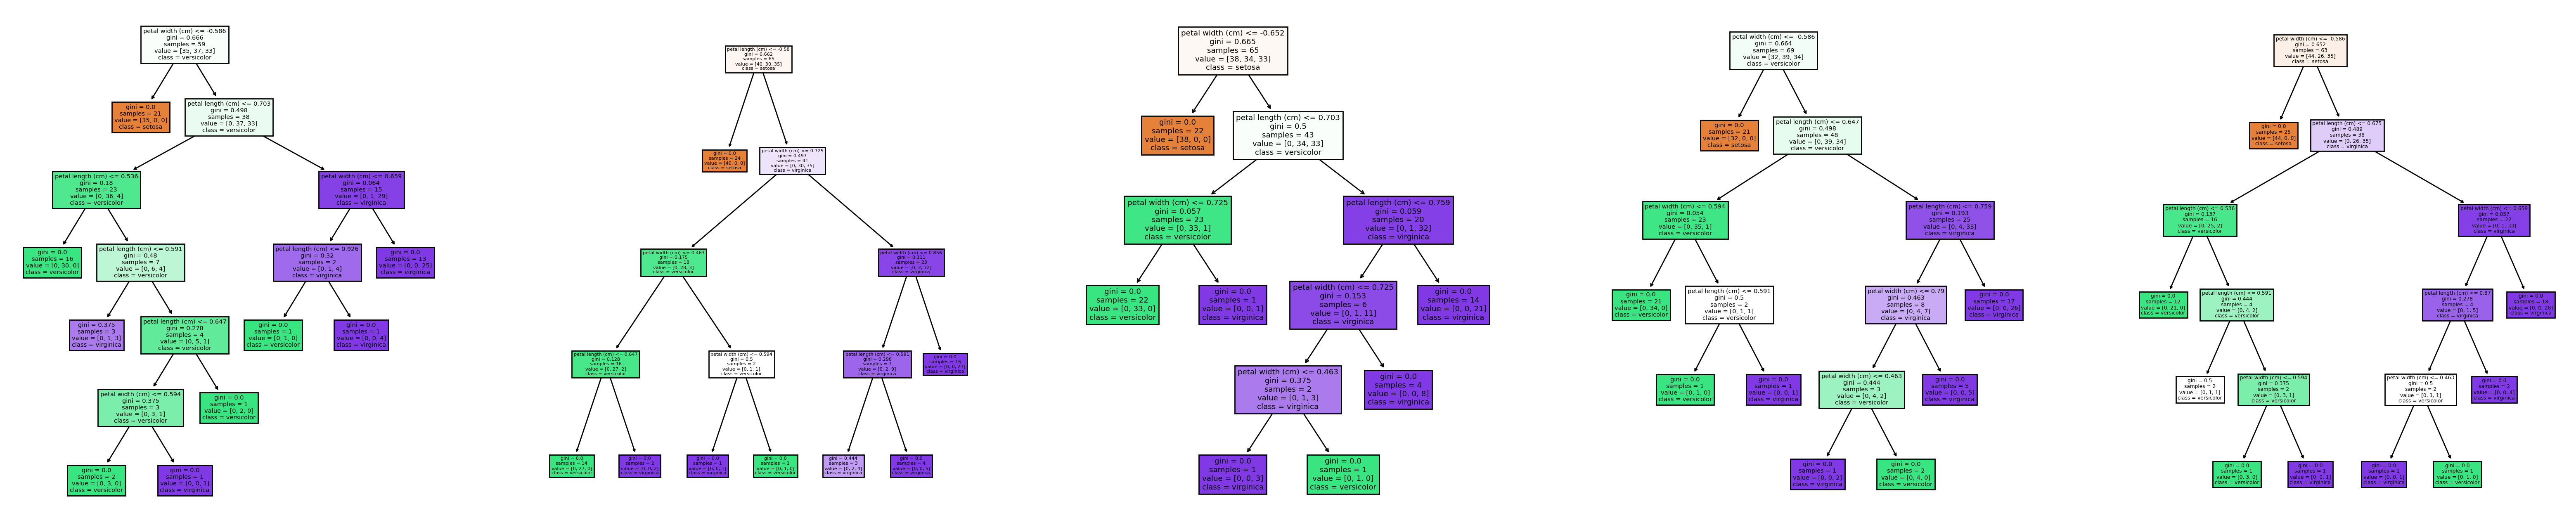

In [88]:
n_tree = 5

fig, ax = plt.subplots(1, n_tree, figsize = (40, 8))
for i in range(n_tree):
    plot_tree(
        model.estimators_[i],
        feature_names = iris.feature_names[2:4],
        class_names = list(iris.target_names),
        filled = True,
        ax = ax[i]
    )

<Axes: >

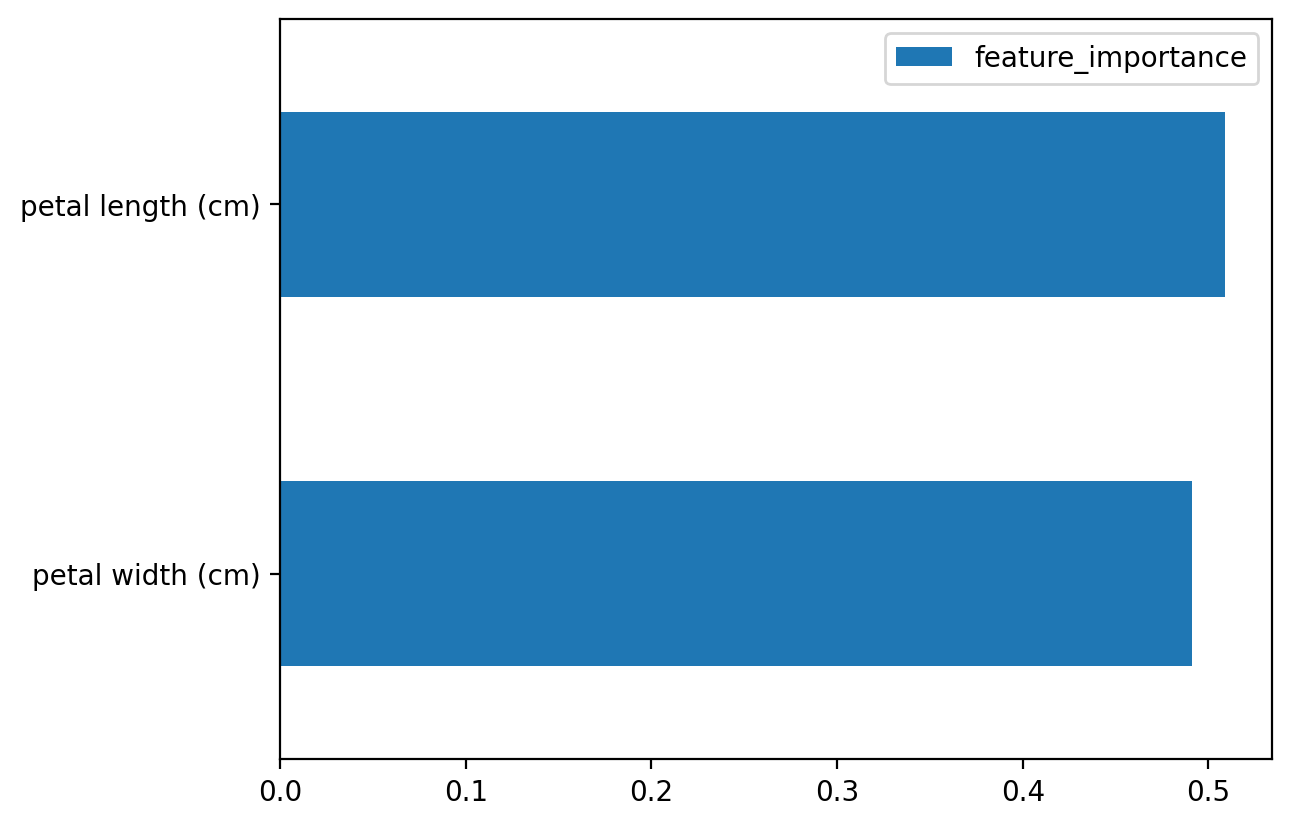

In [97]:
#model.feature_importances_
fimp = pd.DataFrame(model.feature_importances_, columns = ['feature_importance'], index = ['petal length (cm)', 'petal width (cm)'])
fimp.sort_values(by = 'feature_importance', ascending=True).plot(kind = 'barh')

In [91]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']